# Linear Neural Network - Softmax Regression

In this notebook, we cast the Softmax Regression technique for multiclass classification as a Linear Neural Network (LNN).

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import load_iris

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import tensorflow as tf
from tensorflow import keras

np.random.seed(43)

## Decision Bounday: Using Various Thresholds for a Class Probability

We define a function to show the decision boundaries at various thresholds of a class probability. Using the different estimates for a single class, we generate a contour plot. 

In [2]:
def decision_boundary_class_colored(clf, X):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points        
    y_pred = np.argmax(clf.predict(X_new), axis=-1).reshape(x1.shape)
    
   
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.summer, alpha=0.9)

## Multiclass Dataset


We will use the iris dataset, which is a multivariate data set.

This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica

There are 4 features:

- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)


We will use two features (i.e., petal length, petal width).

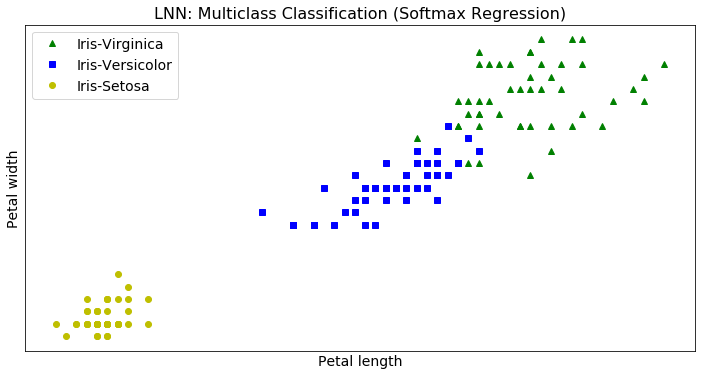

In [3]:
iris = load_iris()

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

label = y

plt.figure(figsize=(12, 6))    
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")


plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("LNN: Multiclass Classification (Softmax Regression)", fontsize=16)
plt.xticks(())
plt.yticks(())
#plt.axis([-1.5, 1.5, -1.5, 1.5])

plt.show()

## Create a LNN Model

Using the Keras Dense layer we create the LNN model for Softmax Regression. **In a Dense layer, each neuron is connected to all inputs/neurons of the previous layer**.

The LNN model:
- has 3 neurons because it's a 3-class classification problem.
- uses the softmax activation function.

At first, we need to specify the shape of the input using the Input layer. The Input layer is used to instantiate a Keras tensor, which is a TensorFlow symbolic tensor object.
- We must set the "shape" parameter, which is a tuple (integers) idicating the dimension of the input vectors. In this demo, input is a 2D vector, that's why we simply put [2, ] in the tuple. In image classification problems, an image input will be represented as a matrix, in which case we will need to specify the size of the matrix. For example, for 28 x 28 image input matrix, "shape" tuple will be [28, 28]. Note that we don't need to include the batch size.

Dense layer:
- kernel_initializer: we initialize the weights (also known as kernel) with zero values. In logistic/softmax regression, initial zero weight values are ok. However, in nonlinear neural networks, such as in Multi-layer Perceptron (MLPs), we must use small random values to initialize the weights. For that we need to use sophisticated initializers, such as glorot or he.
- activation: we use softmax activation

In [4]:
%%time

'''
Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
'''
keras.backend.clear_session()

'''
To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
'''
np.random.seed(42)
tf.random.set_seed(42)


'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
'''
model = keras.models.Sequential(name="LNN_Multiclass_Classifier")
model.add(keras.layers.Input(shape=[2,]))
model.add(keras.layers.Dense(units=3, kernel_initializer="he_normal", activation="softmax"))


model.summary()

Model: "LNN_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
CPU times: user 28.2 ms, sys: 5.75 ms, total: 33.9 ms
Wall time: 40.3 ms


## Compile & Train the LNN Model

In [5]:
'''
Define the optimizer
'''
optimizer = keras.optimizers.SGD(learning_rate=0.01)


'''
Compile the model
'''
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])



no_of_epochs = 50
size_of_mini_batch = 64

history = model.fit(X, y, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1)

Epoch 1/50
3/3 [==============================] - 0s 904us/step - loss: 2.5388 - accuracy: 0.3333
Epoch 2/50
3/3 [==============================] - 0s 970us/step - loss: 2.4032 - accuracy: 0.3333
Epoch 3/50
3/3 [==============================] - 0s 870us/step - loss: 2.2850 - accuracy: 0.3667
Epoch 4/50
3/3 [==============================] - 0s 1ms/step - loss: 2.1626 - accuracy: 0.3667
Epoch 5/50
3/3 [==============================] - 0s 787us/step - loss: 2.0438 - accuracy: 0.4467
Epoch 6/50
3/3 [==============================] - 0s 999us/step - loss: 1.9377 - accuracy: 0.5467
Epoch 7/50
3/3 [==============================] - 0s 870us/step - loss: 1.8340 - accuracy: 0.5600
Epoch 8/50
3/3 [==============================] - 0s 869us/step - loss: 1.7403 - accuracy: 0.5667
Epoch 9/50
3/3 [==============================] - 0s 956us/step - loss: 1.6429 - accuracy: 0.5733
Epoch 10/50
3/3 [==============================] - 0s 888us/step - loss: 1.5564 - accuracy: 0.5933
Epoch 11/50
3/3 [====

## Evaluate the LNN Model

In [6]:
numOfEpochs = len(history.history['loss'])
print("Epochs: ", numOfEpochs)

print("\nTest Data: Loss & Accuracy: ", model.evaluate(X, y, verbose=0))

y_predicted = model.predict(X)
y_predicted = np.argmax(y_predicted, axis=-1) # get the label/index of the highest probability class

accuracy = np.mean(y_predicted == y)
print("\nAccuracy: ", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_predicted))

print("\nClassification Report:")
print(classification_report(y, y_predicted))

Epochs:  50

Test Data: Loss & Accuracy:  [0.8497329950332642, 0.5400000214576721]

Accuracy:  0.54

Confusion Matrix:
[[31 19  0]
 [ 0  0 50]
 [ 0  0 50]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.77        50
           1       0.00      0.00      0.00        50
           2       0.50      1.00      0.67        50

    accuracy                           0.54       150
   macro avg       0.50      0.54      0.48       150
weighted avg       0.50      0.54      0.48       150



## Plot The Decision Boundary

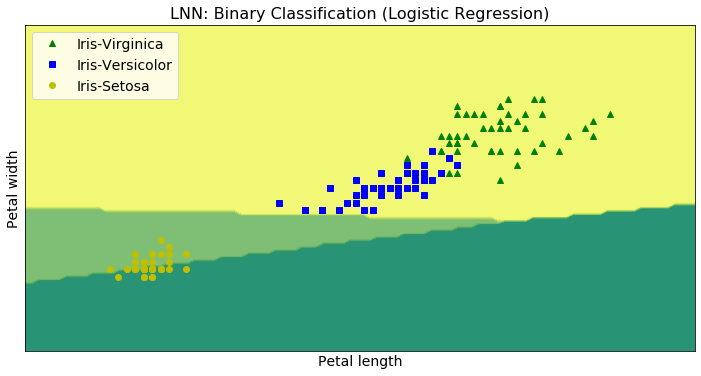

In [7]:
plt.figure(figsize=(12, 6))    

decision_boundary_class_colored(model, X)

plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")


plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("LNN: Binary Classification (Logistic Regression)", fontsize=16)
plt.xticks(())
plt.yticks(())
#plt.axis([-1.5, 1.5, -1.5, 1.5])

plt.show()